# Actividad DBSCAN 
- Jorge Emiliano Pomar 
- A01709338
- 30 de abril de 2025

# DBSCAN
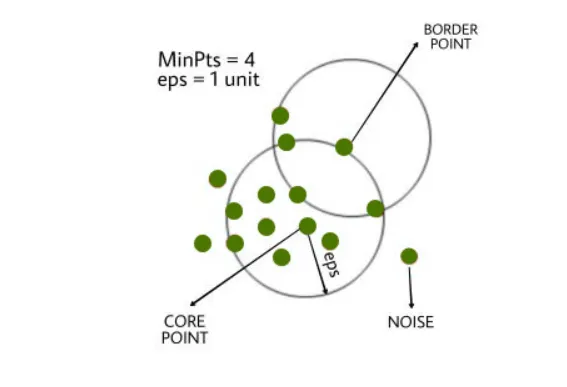

El algoritmo DBSCAN (Density-based spatial clustering of applications with noise) es un algoritmo de agrupamiento de datos no supervisado que identifica grupos de puntos en un conjunto de datos basado en la densidad local de los puntos.

El algoritmo DBSCAN funciona de la siguiente manera:

1. Para cada punto del conjunto de datos, se calcula el número de puntos a una distancia máxima ε de él. Esta zona se denomina ε-vecindad del punto.
2. Un punto se considera un punto central si tiene al menos $k$ puntos en su ε-vecindad, incluida él mismo.
3. Dos puntos centrales que se encuentren dentro de la ε-vecindad del otro se consideran miembros del mismo clúster.
4. Los puntos que no son puntos centrales se consideran **anomalias**.

El algoritmo DBSCAN tiene dos parámetros principales:

* ε: la distancia máxima a la que se consideran vecinos dos puntos.
* *k*: el número mínimo de puntos necesarios para que un punto se considere un punto central.

El algoritmo DBSCAN es un algoritmo versátil que puede ser utilizado para una amplia gama de aplicaciones, incluyendo:

* Segmentación de imágenes
* Análisis de datos espaciales
* Detección de anomalías

Este algoritmo funciona bien si todos los clusters son lo suficientemente densos y están bien separados por regiones de baja-densidad. La clase **DBSCAN** en *Scikit-Learn* es simple de usar. Probemos con el dataset moons:

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
# synthetic data
X, y = make_moons(n_samples=1000, noise=0.05)
X

array([[ 1.97715894, -0.05093297],
       [ 1.96584574,  0.11915889],
       [ 0.38192914, -0.30239986],
       ...,
       [-0.47039931,  0.8455649 ],
       [ 0.69103045, -0.35366401],
       [ 0.99338005,  0.42042055]])

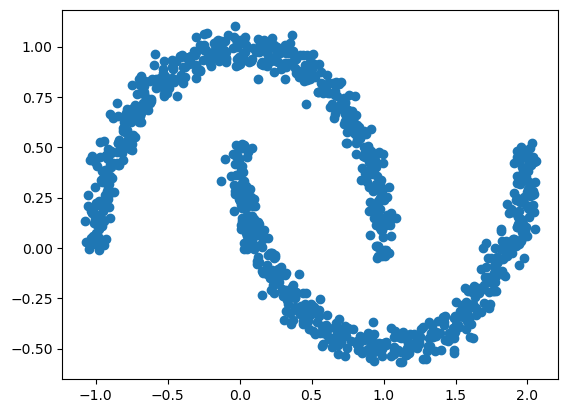

In [56]:
import matplotlib.pyplot as plt
# Grafica de dispersion de puntos
plt.scatter(X[:, 0], X[:,1])
plt.show()

c:\Users\pomar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


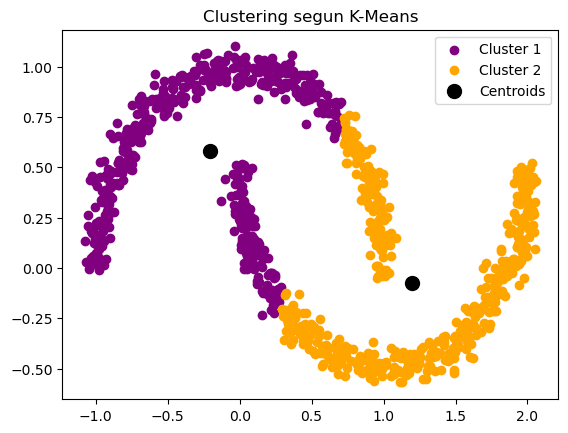

In [57]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='k-means++')
y_kmeans = km.fit_predict(X) # Guardamos asignaciones de cluster
# Graficamos puntos
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            c = 'purple', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            c = 'orange', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c = 'black', label='Centroids', s=100) # Graficamos centroides
plt.title('Clustering segun K-Means')
plt.legend()
plt.show()

## DBSCAN

In [58]:
# epsilon-vecindad, numero de puntos
dbscan = DBSCAN(eps=0.05, min_samples = 5)
dbscan.fit(X) # entrenamiento

DBSCAN(eps=0.05)

The labels of all the instances are now available in the `labels_ instance` variable:

In [59]:
dbscan.labels_

array([-1,  0,  1,  0,  0,  2,  8,  3,  4,  3,  0,  0,  4,  1,  3,  0,  1,
        3,  0,  3,  3,  4,  0,  1,  3,  1,  1,  2,  4,  0,  4,  3,  0,  3,
        4,  5,  1,  0,  3,  3,  6,  7,  3,  0,  3,  6,  0,  1, -1,  2,  1,
        1,  4,  4,  4,  1,  7,  4,  3,  3,  4,  1,  4,  0,  2,  3,  6,  4,
        3,  4,  4,  4,  6,  0,  4,  4,  4,  5,  2,  6,  3, -1,  5,  4,  3,
        3,  4,  3,  0,  4,  3,  3,  3,  5,  5,  0,  2,  5,  3,  2,  3, -1,
        3,  5,  5,  4,  1, -1,  0,  4,  6,  2,  2,  1,  2,  4,  3,  5,  7,
        5,  0,  4,  2,  0,  3,  3,  5,  4, -1,  4,  3,  0,  3,  0,  3,  1,
        5,  2,  0, -1,  6,  0,  3,  0,  0,  4,  2,  0,  4,  3,  5,  2,  1,
        1,  4,  3,  3, -1,  6,  4,  0, -1,  1,  3,  4,  0,  0,  4,  3,  4,
        0,  0,  5,  5,  1,  2,  3,  0,  2,  0,  7,  3,  0,  3,  4,  3,  6,
        5,  6,  5,  5,  5,  4,  5,  4,  4,  0,  3,  2,  1,  0,  3,  4,  0,
        4,  0,  5,  4,  5,  3,  1,  1,  3,  5,  2,  6,  1,  1,  4,  5,  4,
        1,  7,  1,  0,  3

Tenga en cuenta que algunas instancias tienen un índice de clúster igual a -1: esto significa que el algoritmo las considera **anomalías**.

Los índices de las instancias centrales están disponibles en la variable `core_sample_indices_`, y las instancias centrales en sí mismas están disponibles en la variable `components_`.

In [60]:
# ¿Cuántos core-points tengo de los 1000?

In [61]:
# Dame las características de los core-points

# Optimizando sus hiperparámetros

In [62]:
from sklearn.metrics import silhouette_score 
import numpy as np

epsilons = [0.01, 0.05, 0.5, 1.0, 2.0] # vecindad 
min_pts = np.arange(5,11,1)

best_still, best_eps, best_min_pts = -1.0, 0, 0
for e in epsilons: # para cada posible epsilon
    for mp in min_pts:
        # crear y evaluar contra el mejor actual
        dbscan = DBSCAN(eps=e, min_samples=mp)
        dbscan.fit(X)
        try: 
            sil_c = silhouette_score(X, dbscan.labels_)
            print(f'Current Silhoutte score: {round(sil_c, 3)}')
            if sil_c > best_still:
                best_still, best_eps, best_min_pts = sil_c, e, mp
        except: 
            print('No se pudo calcular el Silhoutte score.')


print(f"Best silhouette score found: {best_still} using {best_eps} as epsilon and {best_min_pts} as min pts")            
            

Current Silhoutte score: -0.417
Current Silhoutte score: -0.16
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
Current Silhoutte score: 0.127
Current Silhoutte score: 0.325
Current Silhoutte score: 0.238
Current Silhoutte score: 0.172
Current Silhoutte score: 0.095
Current Silhoutte score: -0.099
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhout

# Actividad en clase
Probemos DBSCAN con el siguiente dataset:

In [63]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
print(california_housing.feature_names)
print(california_housing.DESCR)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousan

In [64]:
import pandas as pd

df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = pd.Series(california_housing.target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Probemos DBSCAN con las siguientes características: `Latitude` y `Longitude`.

In [65]:
LonLat = df[['Latitude', 'Longitude']].values

In [66]:
epsilons = [0.01, 0.05, 0.5, 1.0, 2.0] # vecindad 
min_pts = np.arange(5,11,1)

best_still, best_eps, best_min_pts = -1.0, 0, 0
for e in epsilons: # para cada posible epsilon
    for mp in min_pts:
        # crear y evaluar contra el mejor actual
        dbscan = DBSCAN(eps=e, min_samples=mp)
        dbscan.fit(LonLat)
        try: 
            sil_c = silhouette_score(LonLat, dbscan.labels_)
            print(f'Current Silhoutte score: {round(sil_c, 3)}')
            if sil_c > best_still:
                best_still, best_eps, best_min_pts = sil_c, e, mp
        except: 
            print('No se pudo calcular el Silhoutte score.')


print(f"Best silhouette score found: {best_still} using {best_eps} as epsilon and {best_min_pts} as min pts")  

Current Silhoutte score: -0.182
Current Silhoutte score: -0.262
Current Silhoutte score: -0.345
Current Silhoutte score: -0.417
Current Silhoutte score: -0.488
Current Silhoutte score: -0.554
Current Silhoutte score: 0.175
Current Silhoutte score: 0.192
Current Silhoutte score: 0.197
Current Silhoutte score: 0.182
Current Silhoutte score: 0.185
Current Silhoutte score: 0.182
Current Silhoutte score: 0.11
Current Silhoutte score: 0.307
Current Silhoutte score: 0.334
Current Silhoutte score: 0.373
Current Silhoutte score: 0.387
Current Silhoutte score: 0.388
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte score.
No se pudo calcular el Silhoutte scor

### ¿Cuántos clusters se obtienen?


In [67]:
n_clusters = len(set(dbscan.labels_))
print(f"Se obtienen {n_clusters} clusters.")

Se obtienen 1 clusters.


### Grafica el resultado con un diagrama de dispersión de puntos (scatterplot).

In [68]:

LonLat, y = make_moons(n_samples=1000, noise=0.05)
LonLat

array([[ 0.68961824, -0.47312086],
       [ 0.10627256,  0.0201614 ],
       [-1.03779814,  0.0868448 ],
       ...,
       [ 1.66244278, -0.18891953],
       [-0.63993199,  0.74141273],
       [ 0.44168888, -0.24860262]])

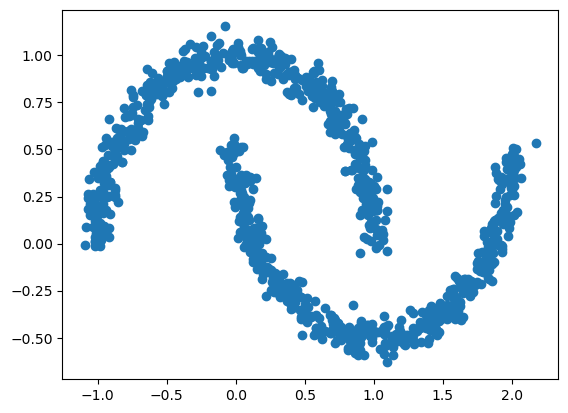

In [69]:
# Grafica de dispersion de puntos
plt.scatter(LonLat[:, 0], LonLat[:,1])
plt.show()

c:\Users\pomar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


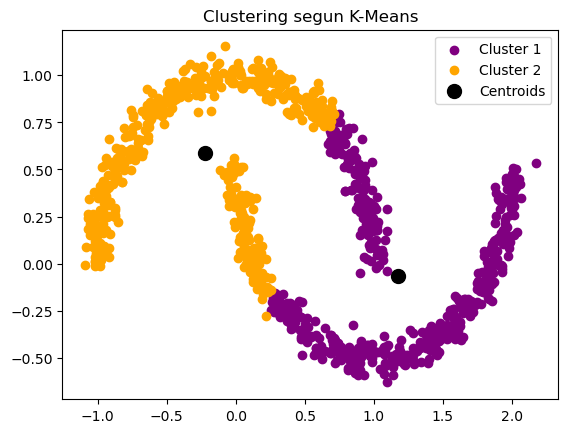

In [70]:
km = KMeans(n_clusters=2, init='k-means++')
y_kmeans = km.fit_predict(LonLat) # Guardamos asignaciones de cluster
# Graficamos puntos
plt.scatter(LonLat[y_kmeans == 0, 0], LonLat[y_kmeans == 0, 1],
            c = 'purple', label='Cluster 1')
plt.scatter(LonLat[y_kmeans == 1, 0], LonLat[y_kmeans == 1, 1],
            c = 'orange', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c = 'black', label='Centroids', s=100) # Graficamos centroides
plt.title('Clustering segun K-Means')
plt.legend()
plt.show()

## Dispersión 

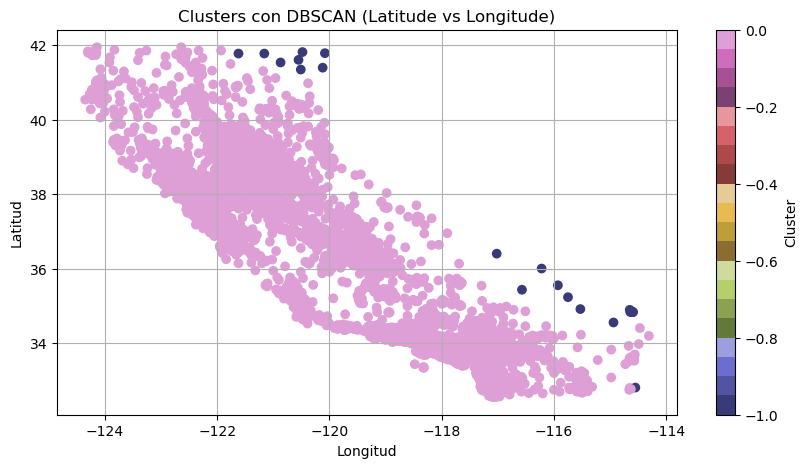

In [79]:
db = DBSCAN(eps=0.5, min_samples=10) # Uso 0.5 y 10 que son los mejores hiperparámetros
labels = db.fit_predict(df[['Latitude', 'Longitude']])


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df['Longitude'], df['Latitude'], c=labels, cmap='tab20b')
plt.title('Clusters con DBSCAN (Latitude vs Longitude)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### ¿Cuáles son los mejores hiperparámetros para las 2 características?: `eps` y `min_samples`.

- eps: 0.5 
- min_samples: 10

### ¿Cuáles son los mejores hiperparámetros para un DBSCAN con todas las características?

- eps: 2.0
- min_samples: 10